In [36]:
import os
import glob
import pickle
from scipy import spatial
import matplotlib.pyplot as plt
import pargap as nu
import pandas as pd
import geopandas as gpd
import laspy
import numpy as np
from datetime import datetime
import importlib

TEAK_clipped_las_path = "/data/shared/src/STV/NEON_TEAK/allen/data/clipped_las/"

object_folder = "/data/shared/src/STV/NEON_TEAK/allen/object_data"
figs_folder = '/data/shared/src/STV/NEON_TEAK/allen/figs/small_footprint'

In [63]:
def get_date_subfolder():
    current_date = datetime.now()
    return current_date.strftime('%Y_%m_%d')

def process_las(clipped_las_dir):
    """Process LAS files to perform gap analysis."""

    # List all LAS files in the directory
    las_filelist = glob.glob(os.path.join(clipped_las_dir, "*.las"))

    pgap_list = []

    for las_fp in las_filelist:
        
        print(os.path.basename(las_fp))

        # Extract the filename without the path
        file_name = os.path.basename(las_fp)
        
        # Split the filename and extract both TEAK and plot number
        file_name_parts = file_name.split('_')
        plot_id = file_name_parts[1] + "_" + file_name_parts[2]  # This will give you TEAK_001
        
        # Read in data using laspy
        las = laspy.read(las_fp)
        
        # Extract all points
        x_points = np.array(las.x)
        y_points = np.array(las.y)
        z_points = np.array(las.z)
        scan_angles = np.array(las.scan_angle_rank)
        classifications = np.array(las.classification)
        
        # Run GapDS on all points
        pgap = nu.GapDS(x_points, y_points, z_points, scan_angles, classifications)
            
        pgap_list.append((pgap, plot_id))
    
    # Define the path for the pickle file
    pickle_file_path = os.path.join(object_folder, "TEAK_pgap_list.pkl")
    
    # Save the pgap_list to a pickle file
    with open(pickle_file_path, "wb") as f:
        pickle.dump(pgap_list, f)
    
    print(f"object file saved to: {pickle_file_path}")

def plot_smfp_at_TEAK():
    # Check if the pickle file exists
    pickle_file = os.path.join(object_folder, "TEAK_pgap_list.pkl")
    
    # Load the pgap_list from the pickle file
    with open(pickle_file, "rb") as f:
        pgap_list = pickle.load(f)
        
    print(len(pgap_list))

    # Number of items per plot
    items_per_plot = 20
    num_plots = (len(pgap_list) + items_per_plot - 1) // items_per_plot  # Calculate number of plots needed
    
    for plot_idx in range(num_plots):
        start_idx = plot_idx * items_per_plot
        end_idx = min(start_idx + items_per_plot, len(pgap_list))
        
        # Create subplots
        fig, axs = plt.subplots(5, 4, figsize=(20, 30), sharex=True)
        ax = axs.flatten()

        for plt_idx in range(end_idx - start_idx):
            pgap, plotid = pgap_list[start_idx + plt_idx]
            # Plot Gap and foliageDensity
            ax[plt_idx].plot(pgap.gap, pgap.height, c="#1f77b4", label="Gap")
            # ax[plt_idx].plot(pgap.foliageDensity, pgap.height, c="#2ca02c", label="Foliage")

            ax[plt_idx].plot(pgap.cumulative_gap, pgap.height, c='yellow', label="Cumulative Gap")
            ax[plt_idx].plot(pgap.waveform, pgap.height, c='red', label='waveform')

            ax[plt_idx].set_title(f"{plotid}", fontsize=10)
            ax[plt_idx].set_xlim(-0.1, 1.1)
            ax[plt_idx].set_xticks(np.linspace(-0.1, 1.1, num=6))  # Create 6 ticks from -0.1 to 1.1
            ax[plt_idx].set_xticklabels([f"{x:.1f}" for x in np.linspace(-0.1, 1.1, num=6)])  # Set custom labels
            ax[plt_idx].tick_params(axis='x', labelsize=10)  # Adjust tick label size
            ax[plt_idx].legend()

        # fig.suptitle(f"TEAK psudeo fp and gap", fontsize=16, fontweight="bold")
        fig.tight_layout()
        
        # Define the output path and ensure the directory exists
        date_subfolder = get_date_subfolder()
        output_date_directory = os.path.join(figs_folder, date_subfolder)
        os.makedirs(output_date_directory, exist_ok=True)
        output_path = os.path.join(output_date_directory, f"TEAK_small_footprint_lidar_{plot_idx}.png")
        
        print(f"Length of Pgap_list: {len(pgap_list)}")
        print(f"Saving to: {output_path}")
        fig.savefig(output_path, dpi=300)
        plt.show()
        plt.close(fig)  # Close the figure to free up memory

In [59]:
importlib.reload(nu)
process_las(TEAK_clipped_las_path)

clipped_TEAK_001_clipped_TEAK_001_NEON_D17_TEAK_DP1_320000_4094000_classified_point_cloud_colorized.las
clipped_TEAK_002_clipped_TEAK_002_NEON_D17_TEAK_DP1_318000_4094000_classified_point_cloud_colorized.las
clipped_TEAK_003_clipped_TEAK_003_NEON_D17_TEAK_DP1_321000_4098000_classified_point_cloud_colorized.las
clipped_TEAK_005_clipped_TEAK_005_NEON_D17_TEAK_DP1_323000_4103000_classified_point_cloud_colorized.las
clipped_TEAK_006_clipped_TEAK_006_NEON_D17_TEAK_DP1_316000_4094000_classified_point_cloud_colorized.las
clipped_TEAK_007_clipped_TEAK_007_NEON_D17_TEAK_DP1_317000_4096000_classified_point_cloud_colorized.las
clipped_TEAK_010_clipped_TEAK_010_NEON_D17_TEAK_DP1_317000_4098000_classified_point_cloud_colorized.las
clipped_TEAK_011_clipped_TEAK_011_NEON_D17_TEAK_DP1_321000_4097000_classified_point_cloud_colorized.las
clipped_TEAK_012_clipped_TEAK_012_NEON_D17_TEAK_DP1_321000_4098000_classified_point_cloud_colorized.las
clipped_TEAK_013_clipped_TEAK_013_NEON_D17_TEAK_DP1_318000_40940

23
Length of Pgap_list: 23
Saving to: /data/shared/src/STV/NEON_TEAK/allen/figs/small_footprint/2024_10_02/TEAK_small_footprint_lidar_0.png


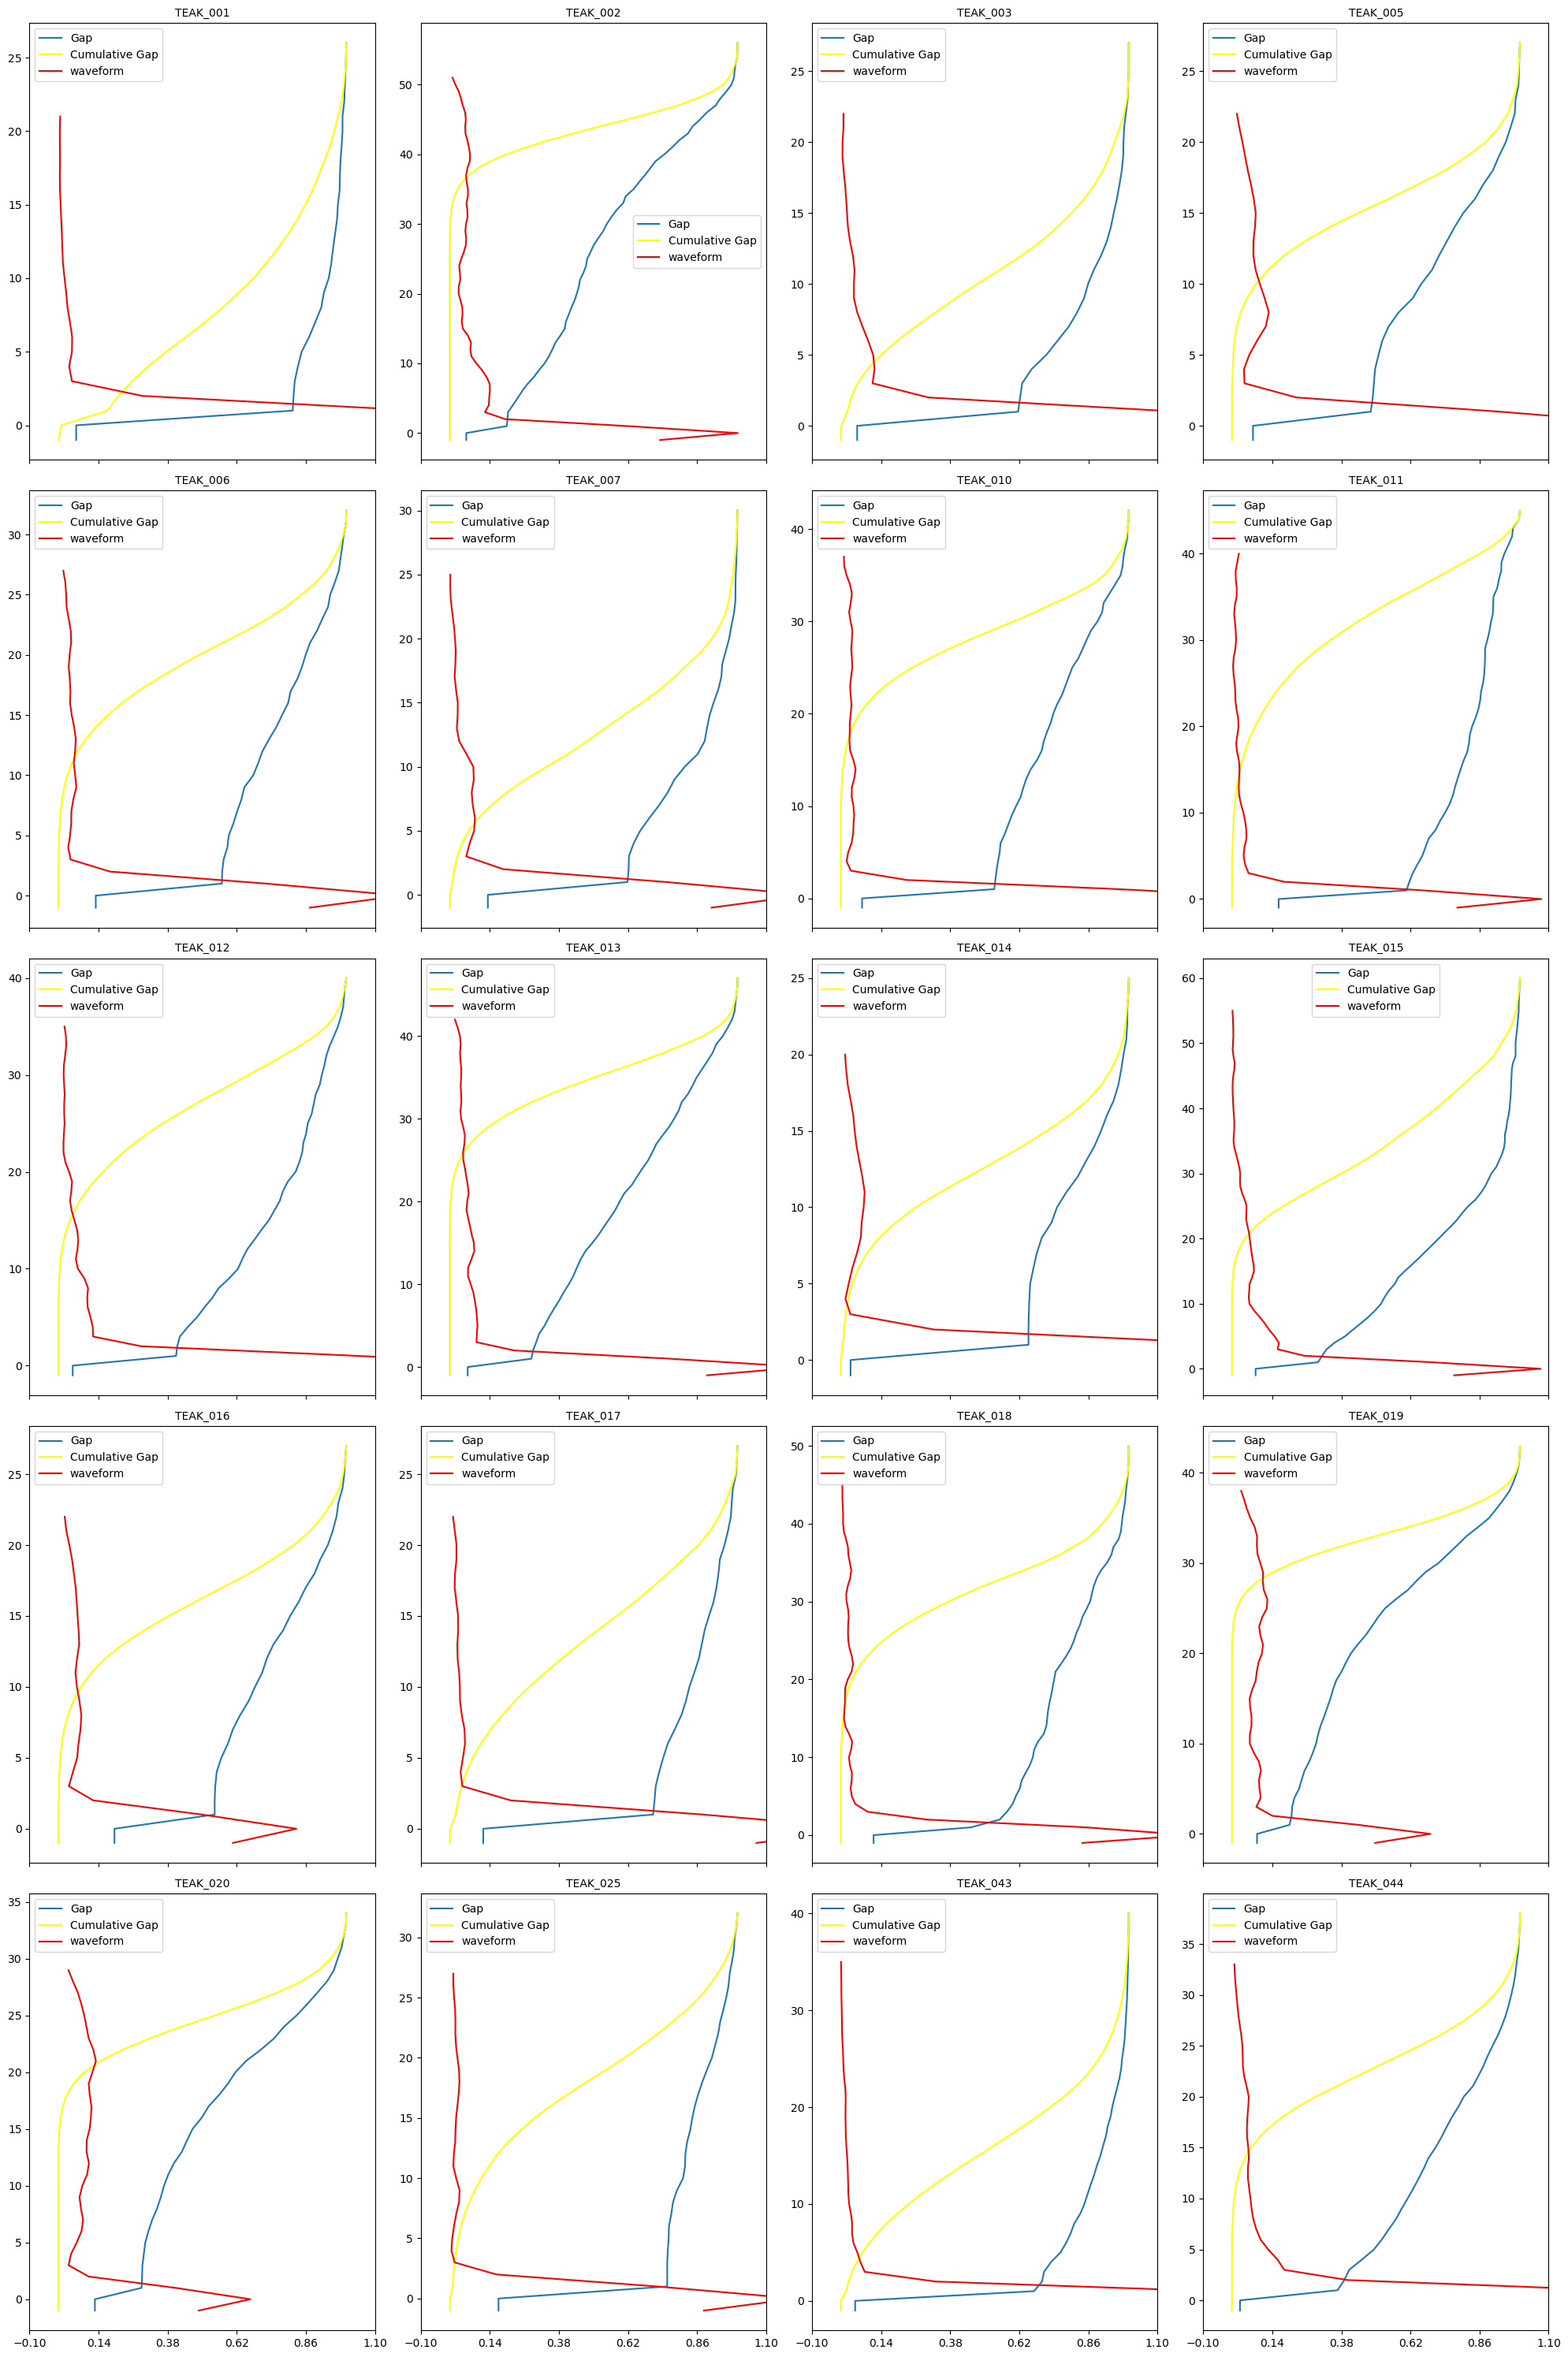

Length of Pgap_list: 23
Saving to: /data/shared/src/STV/NEON_TEAK/allen/figs/small_footprint/2024_10_02/TEAK_small_footprint_lidar_1.png


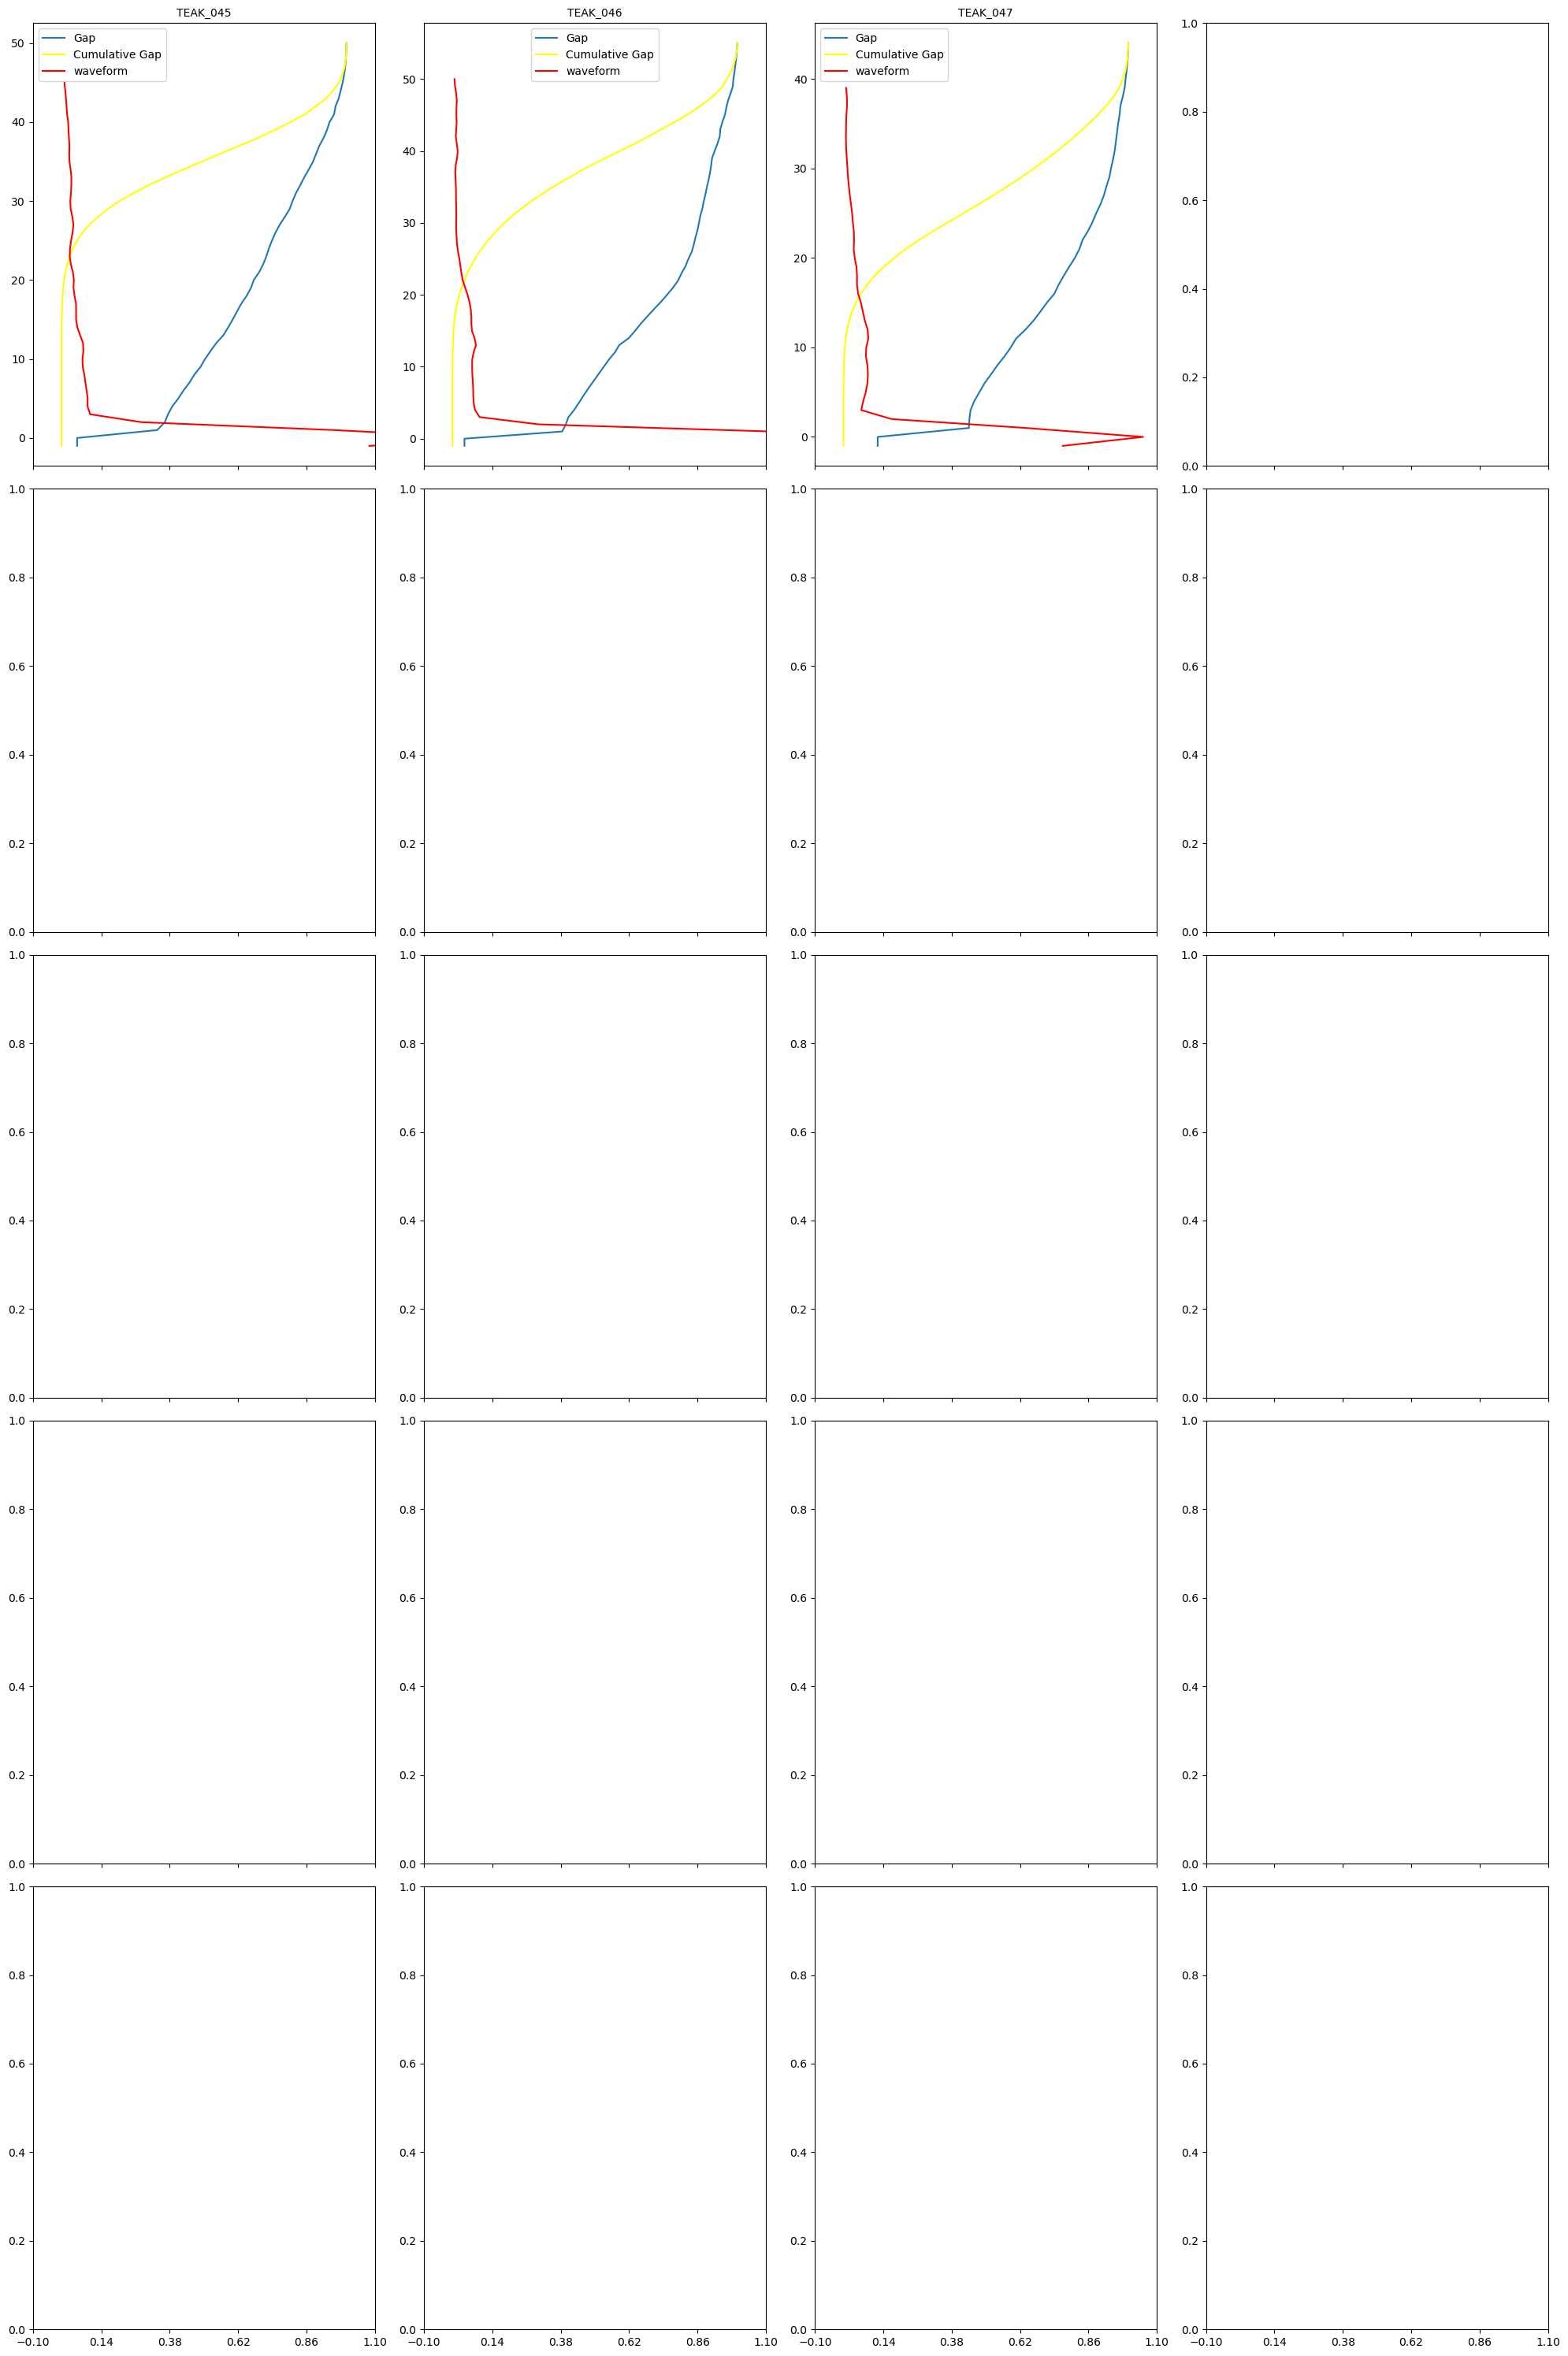

In [64]:
plot_smfp_at_TEAK()